In [2]:
import pandas
import numpy
from matplotlib import pyplot

pandas.set_option('display.max_rows', 500)

In [3]:
votos = pandas.read_csv('../data/data.csv')

In [4]:
votos.columns

Index(['id', 'date', 'fathers', 'cargos', 'showCargos', 'census',
       'pollingCensus', 'numStation', 'pollingNumStation', 'pollingPercCensus',
       'pollingPercStation', 'electores', 'sobres', 'nulos', 'percNulos',
       'recurridos', 'percRecurridos', 'blancos', 'percBlancos', 'comando',
       'percComando', 'impugnados', 'percImpugnados', 'totalVotos',
       'afirmativos', 'percAfirmativos', 'abstencion', 'percAbstencion',
       'valid', 'percValid', 'recImpCom', 'percRecImpCom', 'participation',
       'isCircus', 'umbral', 'calcPerc', 'imagen', 'hayEmpates', 'partidos',
       'id_mesa', 'level_7', 'level_6', 'level_4', 'level_2', 'level_1',
       'partido_code', 'partido_name', 'partido_votos', 'partido_perc',
       'partido_percCarg', 'partido_cargos', 'partido_candidatos', 'level_5',
       'level_3'],
      dtype='object')

In [5]:
def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.quantile(0.5)

def q3(x):
    return x.quantile(0.75)

votos.groupby('partido_candidatos').agg({'partido_votos': 'sum', 'partido_perc': [q1, q2, q3]})

partido_votos partido_perc         \
                                                     sum           q1     q2   
partido_candidatos                                                             
JAVIER GERARDO MILEI - VICTORIA VILLARRUEL     7884336.0        23.28  29.15   
JUAN SCHIARETTI - FLORENCIO RANDAZZO           1784315.0         2.78   4.25   
MYRIAM TERESA BREGMAN - NICOLAS DEL CAÑO        709932.0         1.17   2.38   
PATRICIA BULLRICH - LUIS PETRI                 6267152.0        14.91  22.34   
SERGIO TOMAS MASSA - AGUSTIN ROSSI             9645983.0        26.00  35.63   

                                                   
                                               q3  
partido_candidatos                                 
JAVIER GERARDO MILEI - VICTORIA VILLARRUEL  35.79  
JUAN SCHIARETTI - FLORENCIO RANDAZZO         6.87  
MYRIAM TERESA BREGMAN - NICOLAS DEL CAÑO     3.80  
PATRICIA BULLRICH - LUIS PETRI              30.74  
SERGIO TOMAS MASSA - AGUSTIN ROSSI          45.97

<Axes: title={'center': 'Distribución de porcentaje de votos'}, xlabel='Porcentaje', ylabel='Mesas'>

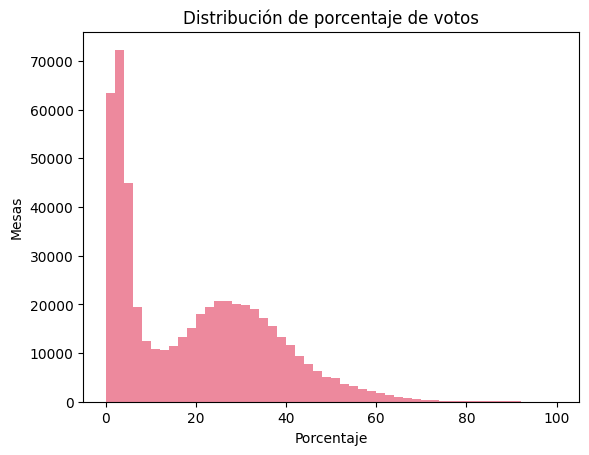

In [23]:
votos['partido_perc'].plot(kind='hist', 
                           bins=50, 
                           xlabel='Porcentaje', 
                           ylabel='Mesas', 
                           title='Distribución de porcentaje de votos',
                           color='crimson',
                           alpha=0.5
)

partido_candidatos
JAVIER GERARDO MILEI - VICTORIA VILLARRUEL    Axes(0.125,0.11;0.775x0.77)
JUAN SCHIARETTI - FLORENCIO RANDAZZO          Axes(0.125,0.11;0.775x0.77)
MYRIAM TERESA BREGMAN - NICOLAS DEL CAÑO      Axes(0.125,0.11;0.775x0.77)
PATRICIA BULLRICH - LUIS PETRI                Axes(0.125,0.11;0.775x0.77)
SERGIO TOMAS MASSA - AGUSTIN ROSSI            Axes(0.125,0.11;0.775x0.77)
Name: partido_perc, dtype: object

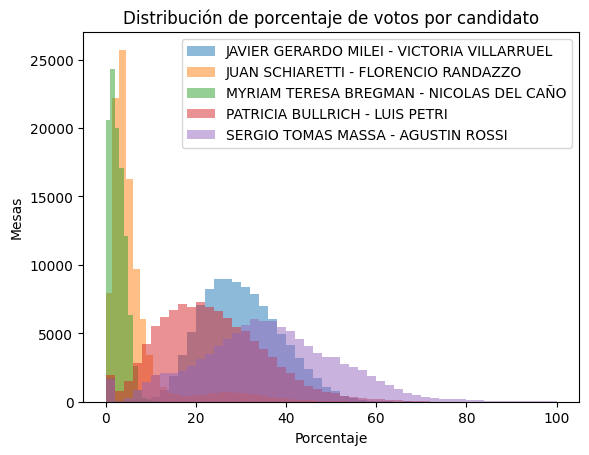

In [7]:
votos.groupby('partido_candidatos')['partido_perc'].plot(kind='hist', 
                                                         bins=50, 
                                                         alpha=0.5, 
                                                         legend=True, 
                                                         xlabel='Porcentaje', 
                                                         ylabel='Mesas', 
                                                         title='Distribución de porcentaje de votos por candidato'
)

Candidatos  SERGIO TOMAS MASSA - AGUSTIN ROSSI


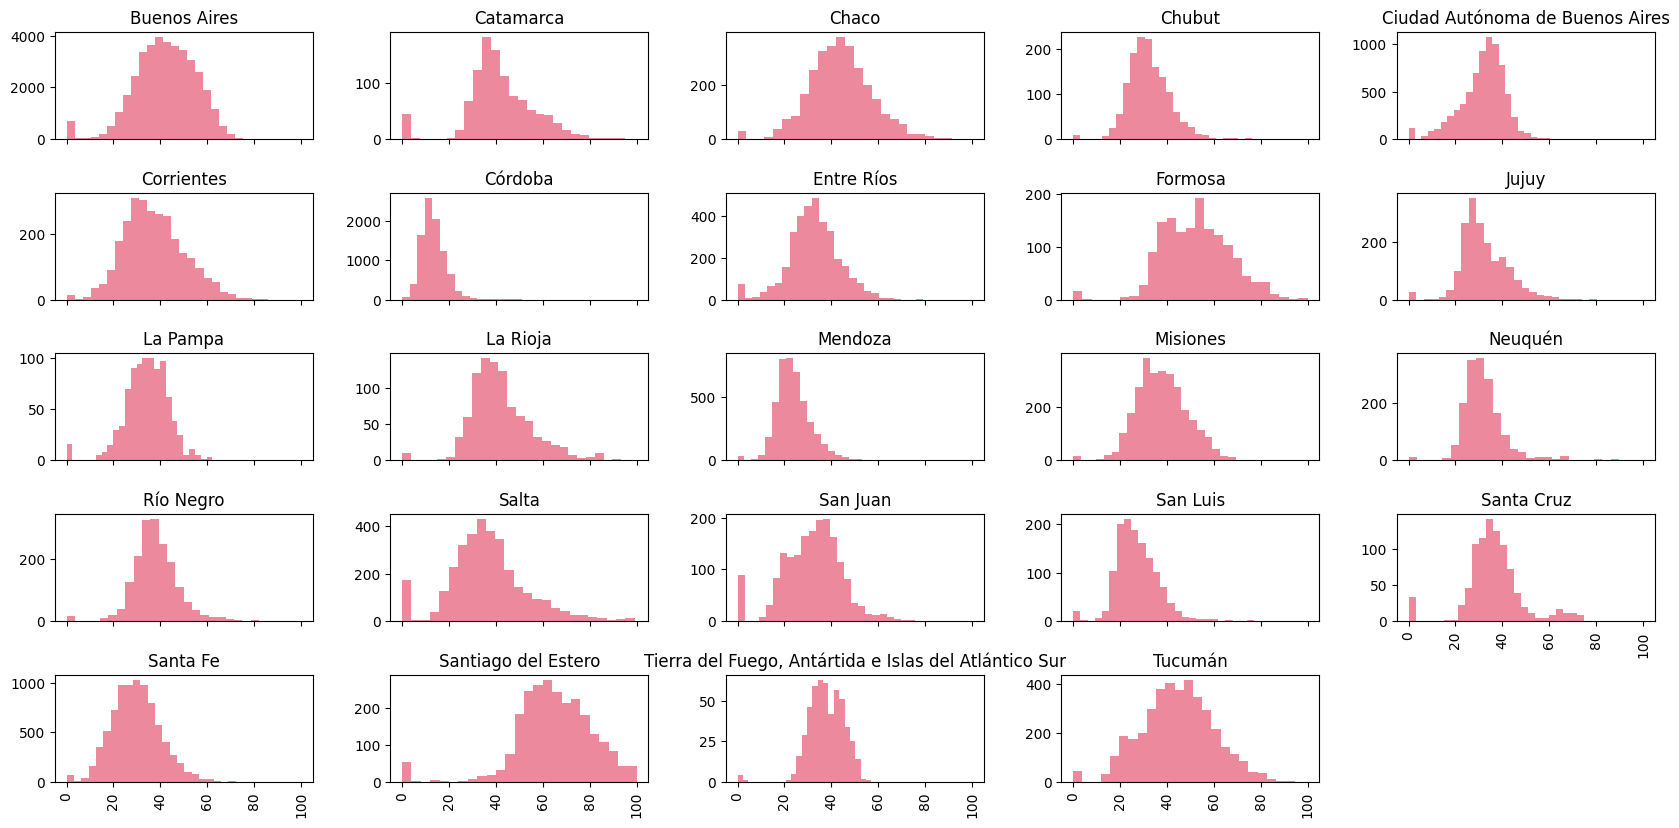

Candidatos  JAVIER GERARDO MILEI - VICTORIA VILLARRUEL


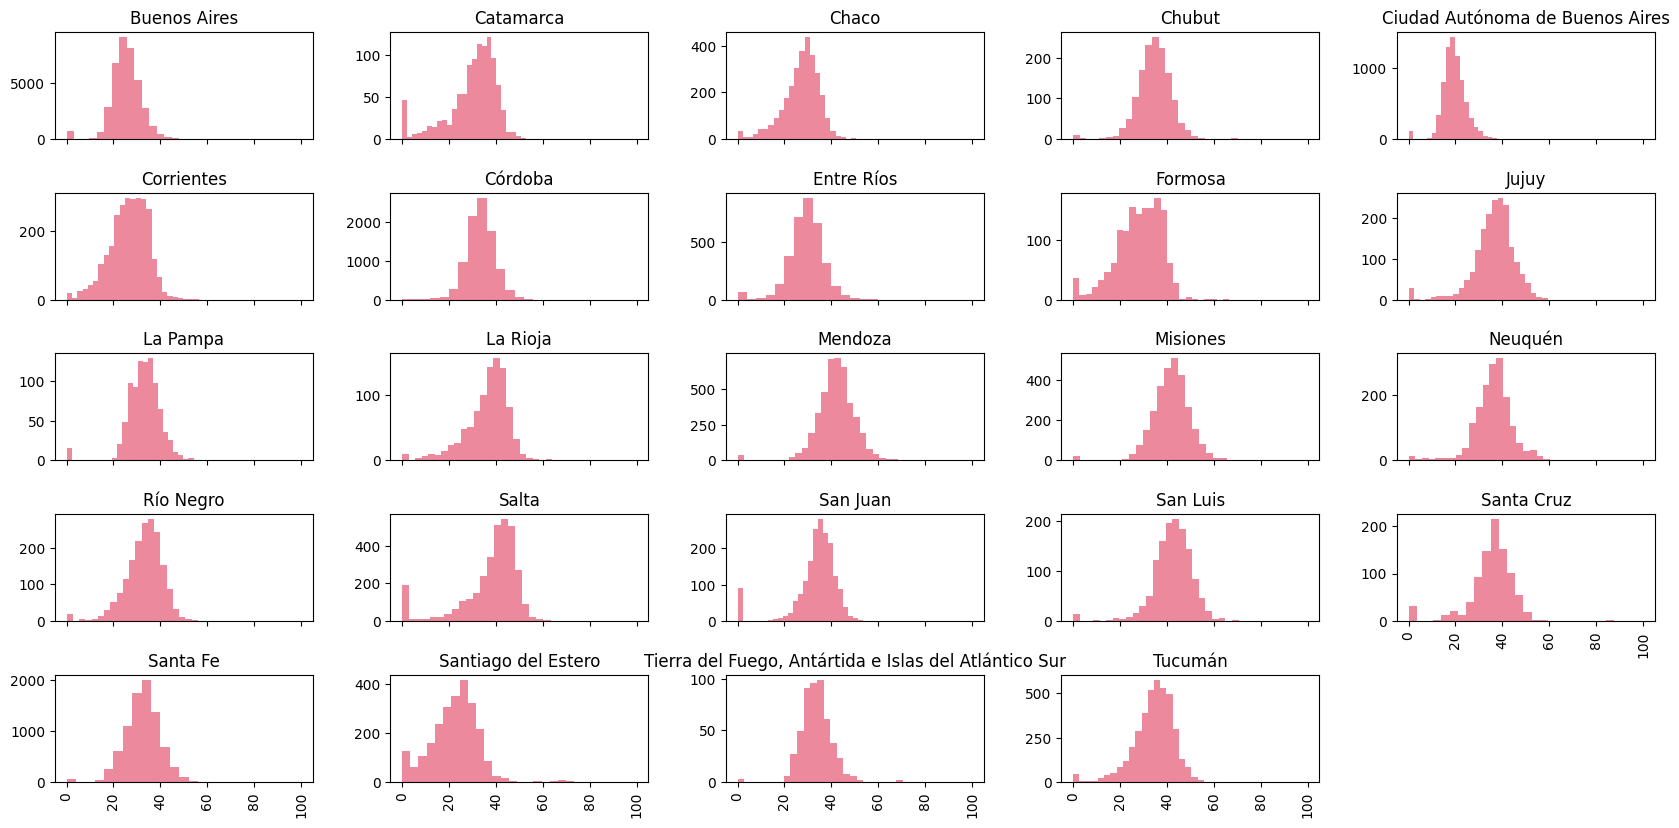

Candidatos  PATRICIA BULLRICH - LUIS PETRI


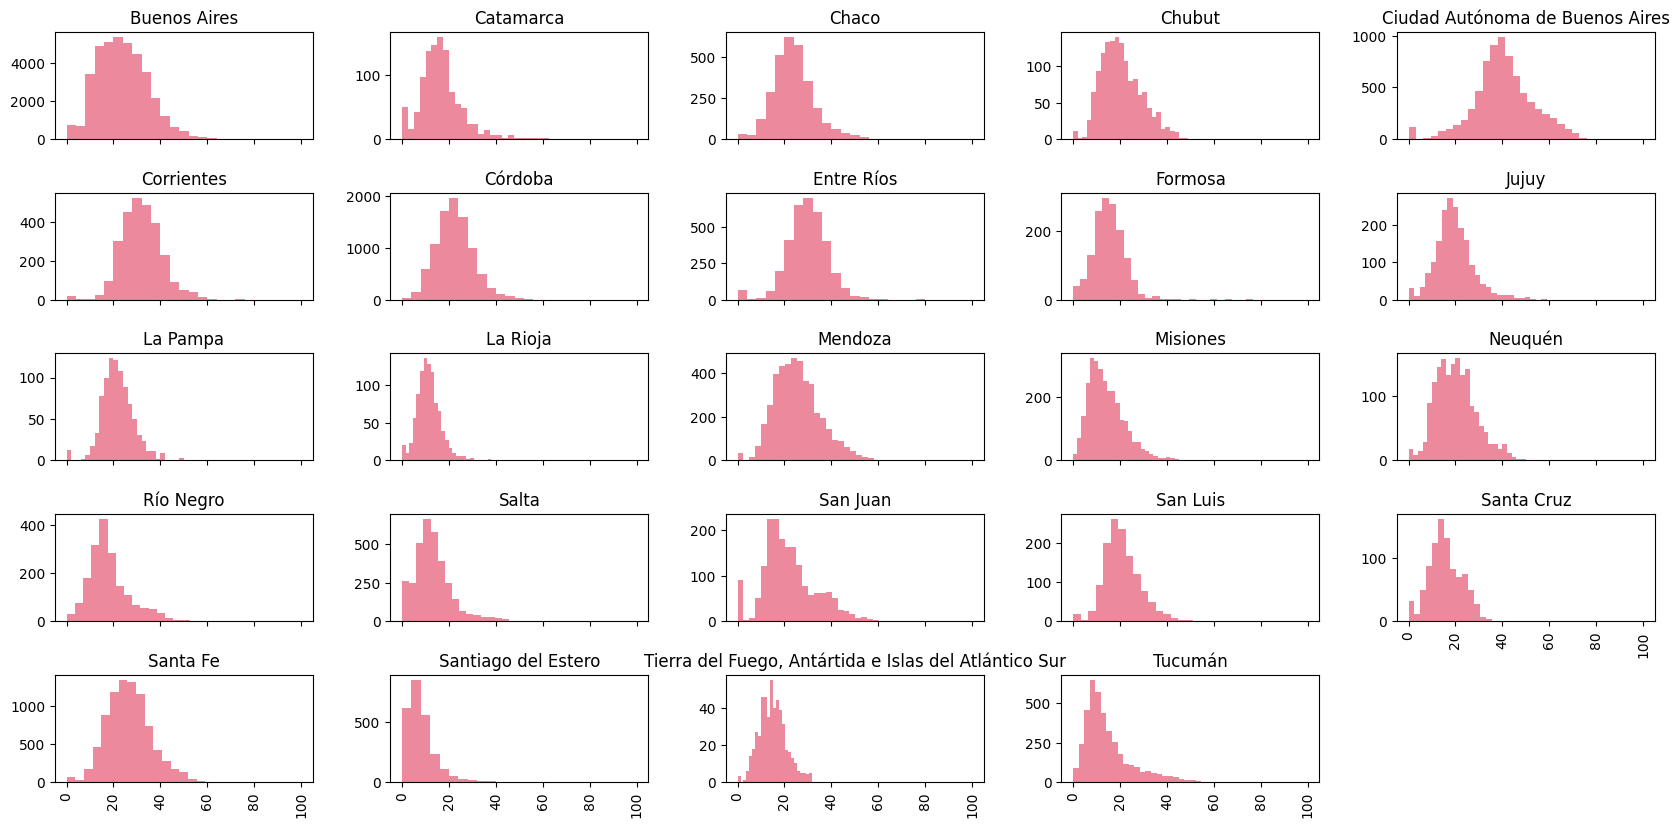

Candidatos  JUAN SCHIARETTI - FLORENCIO RANDAZZO


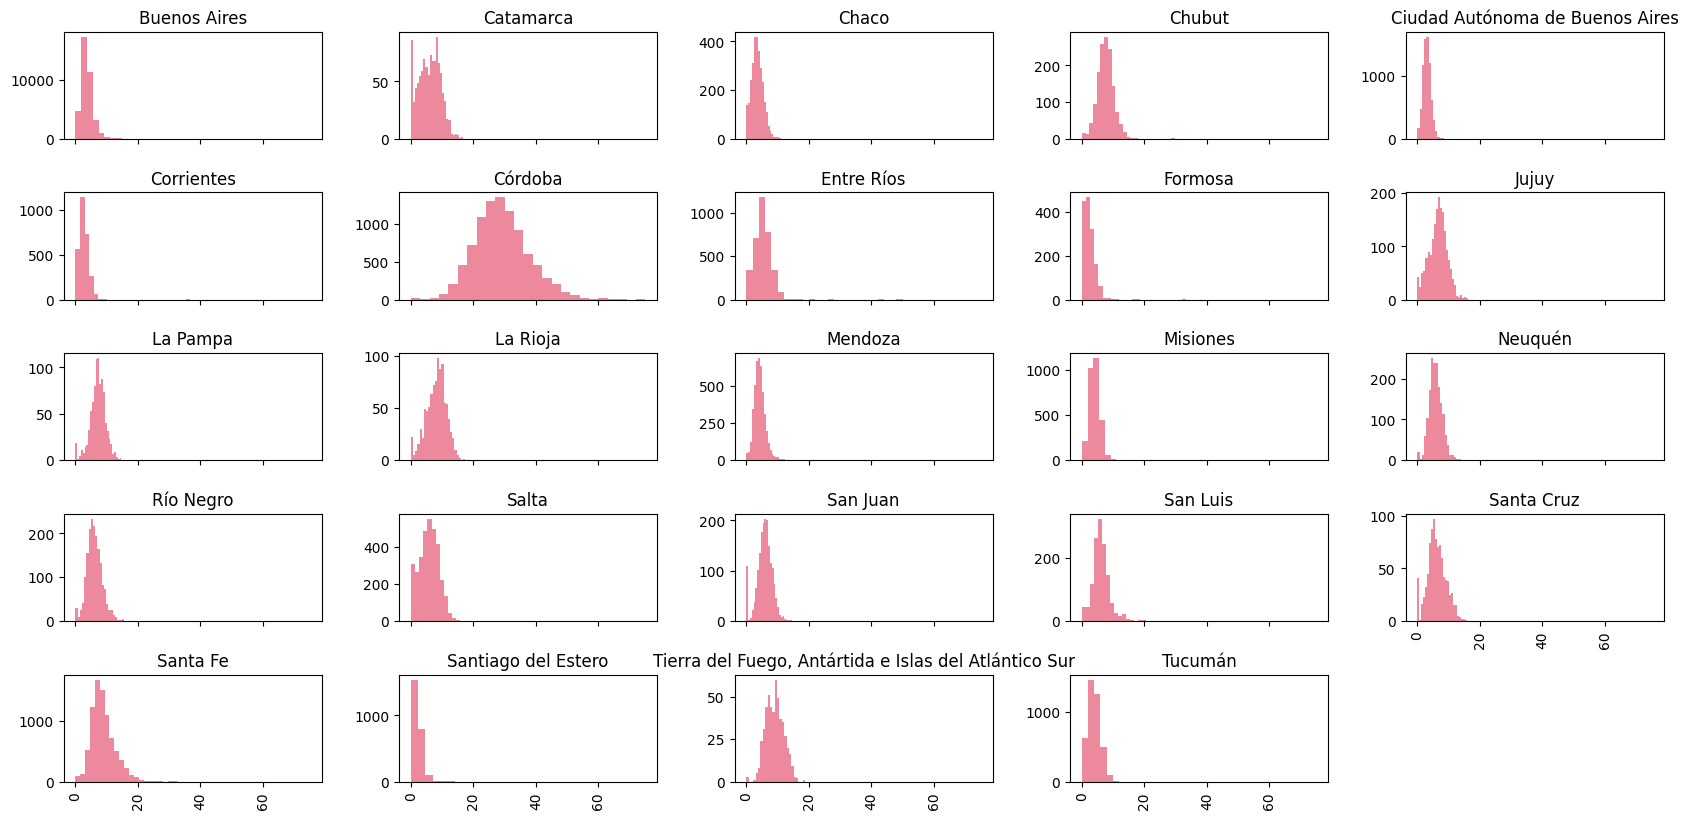

Candidatos  MYRIAM TERESA BREGMAN - NICOLAS DEL CAÑO


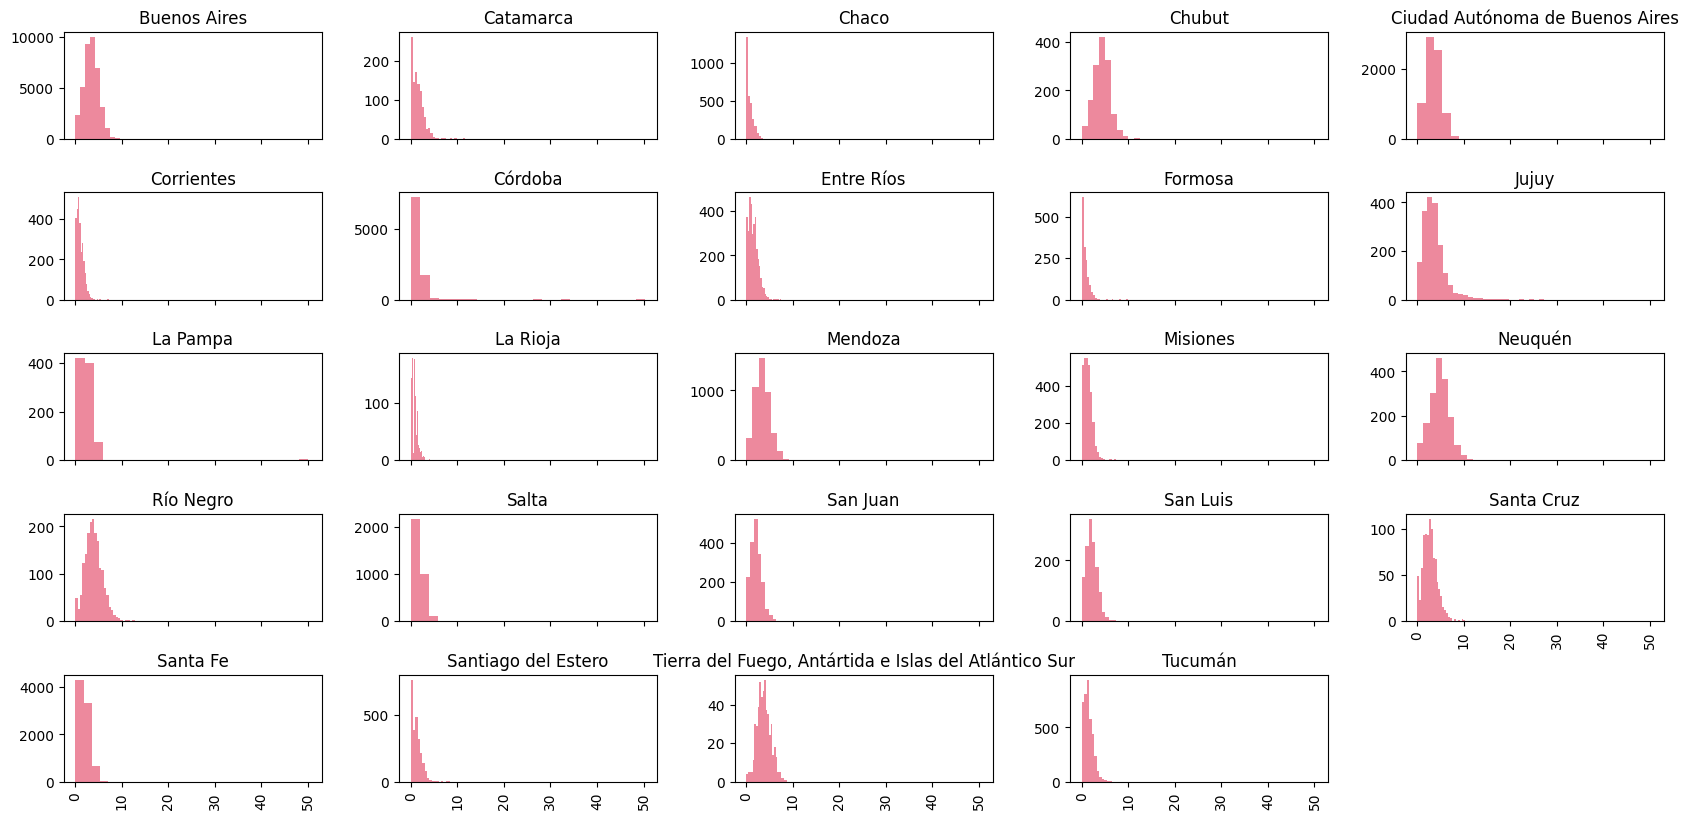

In [24]:
for candidato in votos['partido_candidatos'].unique():
    votos[votos['partido_candidatos'] == candidato].hist('partido_perc', by='level_2', figsize=(20, 10), bins=25, sharex=True, color='crimson', alpha=0.5)
    print('Candidatos ', candidato)
    pyplot.show()

## Mesas / Candidatos ordenados por porcentaje de votos

In [20]:
campos = ['id_mesa', 'partido_candidatos', 'level_2', 'level_4', 'level_7', 'partido_perc','totalVotos']
votos.sort_values(by='partido_perc', ascending=False)[campos].query('totalVotos > 30').head(500)

,id_mesa,partido_candidatos,level_2,level_4,level_7,partido_perc,totalVotos
390100,0800100064X,PATRICIA BULLRICH - LUIS PETRI,Entre Ríos,Paraná,ESC PROV N 161 RCA DE ENTRE RIOS,100.00,115.0
277435,2202402294X,SERGIO TOMAS MASSA - AGUSTIN ROSSI,Santiago del Estero,San Martín,ESCUELA N° 747,100.00,235.0
514440,2201801930X,SERGIO TOMAS MASSA - AGUSTIN ROSSI,Santiago del Estero,Pellegrini,ESCUELA N° 1006,100.00,239.0
158660,2200601262X,SERGIO TOMAS MASSA - AGUSTIN ROSSI,Santiago del Estero,Banda,ESCUELA N° 66 MAURO CARRANZA,100.00,216.0
311950,2202202112X,SERGIO TOMAS MASSA - AGUSTIN ROSSI,Santiago del Estero,Río Hondo,ESCUELA N° 723,100.00,229.0
7265,2200100717X,SERGIO TOMAS MASSA - AGUSTIN ROSSI,Santiago del Estero,Capital,ESCUELA N° 268 MANUEL CACERES,100.00,220.0
274340,2201201619X,SERGIO TOMAS MASSA - AGUSTIN ROSSI,Santiago del Estero,Jiménez,ESCUELA N° 976,100.00,122.0
512545,0205200738X,PATRICIA BULLRICH - LUIS PETRI,Buenos Aires,General San Martín,CENTRO DE FORMAC.PROFES.N°401,100.00,60.0
159415,2201001558X,SERGIO TOMAS MASSA - AGUSTIN ROSSI,Santiago del Estero,Figueroa,ESCUELA N° 782,99.56,228.0
74870,2202202114X,SERGIO TOMAS MASSA - AGUSTIN ROSSI,Santiago del Estero,Río Hondo,ESCUELA N° 723,99.56,231.0
